In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data=pd.read_csv('Lesson11.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
data= pd.read_csv('Lesson11.csv', 
                  index_col='Month', 
                  parse_dates=['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
data= data['#Passengers']
data['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [6]:
data['1960']

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

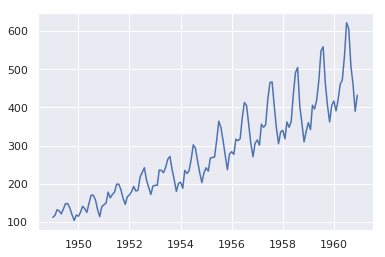

In [7]:
plt.plot(data)

# 自己回帰（AR）モデル

In [8]:
# 航空機の乗客者数の変化(=data)を用いた1次ARモデル＝ARモデル(1)を作成
model = ARMA(data, 
             order=(1,0), 
             freq=data.index.inferred_freq)
# fit()で学習
model_fit = model.fit(disp=False)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

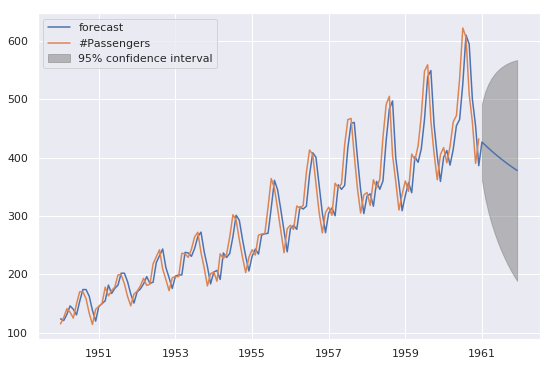

In [9]:
fig,ax = plt.subplots(figsize=(9,6))
# plot_predict()で予測＆描画
fig= model_fit.plot_predict(start='1950-01-01',
                            end='1961-12-01', 
                            ax=ax)

図11-2:ARモデル（1）による回帰

In [10]:
model_fit.aic

1428.1793789726955

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                     ARMA(1, 0)   Log Likelihood                -711.090
Method:                       css-mle   S.D. of innovations             33.446
Date:                Fri, 29 Nov 2019   AIC                           1428.179
Time:                        03:57:55   BIC                           1437.089
Sample:                    01-01-1949   HQIC                          1431.800
                         - 12-01-1960                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               278.0373     67.025      4.148      0.000     146.671     409.404
ar.L1.#Passengers     0.9646      0.021     45.139      0.000       0.923       1.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0367           +0.0000j            1.0367            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
model_fit.aic

1428.1793789726955

# 移動平均（MA）モデル

In [13]:
model = ARMA(data, 
             order=(0,1), 
             freq=data.index.inferred_freq)
model_fit = model.fit(disp=False)

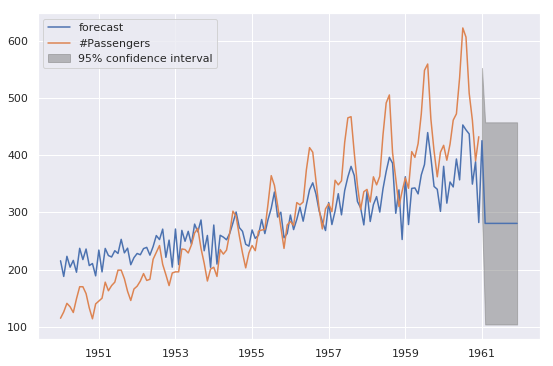

In [14]:
fig,ax= plt.subplots(figsize=(9,6))
fig = model_fit.plot_predict(start='1950-01-01',
                             end='1961-12-01', 
                             ax=ax)

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                     ARMA(0, 1)   Log Likelihood                -806.431
Method:                       css-mle   S.D. of innovations             64.849
Date:                Fri, 29 Nov 2019   AIC                           1618.863
Time:                        03:58:00   BIC                           1627.772
Sample:                    01-01-1949   HQIC                          1622.483
                         - 12-01-1960                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               280.6471     10.579     26.529      0.000     259.913     301.381
ma.L1.#Passengers     0.9642      0.021     45.058      0.000       0.922       1.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0371           +0.0000j            1.0371            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
model_fit.aic

1618.86252698635

# 自己回帰移動平均（ARMA）モデル

In [17]:
model = ARMA(data, 
             order=(1,1), 
             freq=data.index.inferred_freq)
model_fit = model.fit(disp=False)

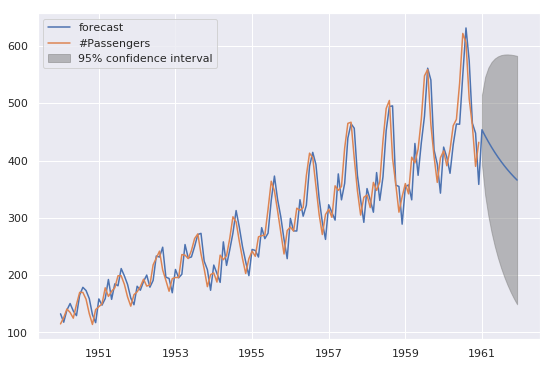

In [18]:
fig,ax =plt.subplots(1,1,figsize=(9,6))
fig = model_fit.plot_predict(start='1950-01-01',
                             end='1961-12-01',
                             ax=ax)

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                     ARMA(1, 1)   Log Likelihood                -700.874
Method:                       css-mle   S.D. of innovations             31.121
Date:                Fri, 29 Nov 2019   AIC                           1409.748
Time:                        03:58:06   BIC                           1421.628
Sample:                    01-01-1949   HQIC                          1414.575
                         - 12-01-1960                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               281.4512     53.618      5.249      0.000     176.362     386.541
ar.L1.#Passengers     0.9373      0.030     31.045      0.000       0.878       0.996
ma.L1.#Passengers     0.4264      0.091      4.682      0.000       0.248       0.605
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0669           +0.0000j            1.0669            0.0000
MA.1           -2.3452           +0.0000j            2.3452            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
model_fit.aic

1409.7482701263789

# 自己回帰和分移動平均（ARIMA）モデル

In [21]:
model =ARIMA(data,
             order=(1,1,1), 
             freq=data.index.inferred_freq)
model_fit = model.fit(disp=False)

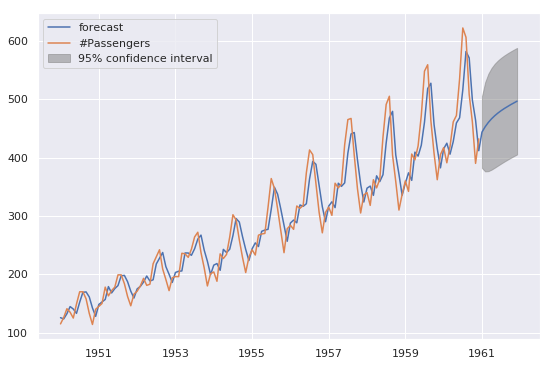

In [22]:
fig,ax= plt.subplots(1,1,figsize=(9,6))
fig= model_fit.plot_predict(start='1950-01-01',
                            end='1961-12-01',
                            ax=ax)

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Fri, 29 Nov 2019   AIC                           1402.145
Time:                        03:58:34   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.#Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.#Passengers    -1.0000      0.019    -53.425      0.000      -1.037      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3513           +0.0000j            1.3513            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
model_fit.aic

1402.1453998019451

# モデル選択

In [26]:
import pmdarima as pm

In [28]:
model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3,  
                      m=1,  # frequency of series
                      d=1,  # let model determine 'd'
                      seasonal=False, 
                      start_P=0, 
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
model.summary()

Fit ARIMA: order=(1, 1, 1); AIC=1402.145, BIC=1413.997, Fit time=0.932 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1415.278, BIC=1421.203, Fit time=0.039 seconds


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

Fit ARIMA: order=(1, 1, 0); AIC=1403.473, BIC=1412.361, Fit time=0.390 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1398.827, BIC=1407.716, Fit time=0.450 seconds
Fit ARIMA: order=(0, 1, 2); AIC=1398.386, BIC=1410.237, Fit time=0.597 seconds
Fit ARIMA: order=(1, 1, 3); AIC=1373.076, BIC=1390.853, Fit time=1.797 seconds
Fit ARIMA: order=(0, 1, 3); AIC=1381.664, BIC=1396.479, Fit time=2.765 seconds
Fit ARIMA: order=(2, 1, 3); AIC=1343.278, BIC=1364.018, Fit time=6.802 seconds
Fit ARIMA: order=(2, 1, 2); AIC=1344.043, BIC=1361.820, Fit time=5.489 seconds
Fit ARIMA: order=(1, 1, 2); AIC=1371.815, BIC=1386.630, Fit time=1.279 seconds
Fit ARIMA: order=(3, 1, 3); AIC=1336.776, BIC=1360.478, Fit time=8.509 seconds
Fit ARIMA: order=(3, 1, 2); AIC=1360.750, BIC=1381.490, Fit time=4.933 seconds
Total fit time: 34.003 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  143
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -660.388
Method:                       css-mle   S.D. of innovations             23.753
Date:                Fri, 29 Nov 2019   AIC                           1336.776
Time:                        04:20:46   BIC                           1360.478
Sample:                             1   HQIC                          1346.407
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5783      0.775      3.325      0.001       1.059       4.098
ar.L1.D.y      0.9661      0.100      9.614      0.000       0.769       1.163
ar.L2.D.y      0.1890      0.165      1.147      0.253      -0.134       0.512
ar.L3.D.y     -0.5878      0.100     -5.885      0.000      -0.784      -0.392
ma.L1.D.y     -1.0103      0.075    -13.483      0.000      -1.157      -0.863
ma.L2.D.y     -0.7206      0.112     -6.409      0.000      -0.941      -0.500
ma.L3.D.y      0.9003      0.073     12.321      0.000       0.757       1.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9163           -0.5349j            1.0611           -0.0841
AR.2            0.9163           +0.5349j            1.0611            0.0841
AR.3           -1.5112           -0.0000j            1.5112           -0.5000
MA.1           -1.1106           -0.0000j            1.1106           -0.5000
MA.2            0.9555           -0.2952j            1.0001           -0.0477
MA.3            0.9555           +0.2952j            1.0001            0.0477
-----------------------------------------------------------------------------
"""

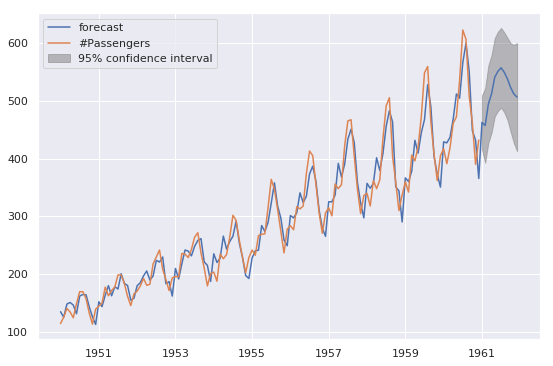

In [30]:
model = ARIMA(data,
              order=(3,1,3),
              freq=data.index.inferred_freq)
model_fit = model.fit(disp=False)

fig,ax= plt.subplots(1,1,figsize=(9,6))
fig = model_fit.plot_predict(start='1950-01-01',
                             end='1961-12-01',
                             ax=ax)

In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -660.388
Method:                       css-mle   S.D. of innovations             23.753
Date:                Fri, 29 Nov 2019   AIC                           1336.776
Time:                        04:30:09   BIC                           1360.478
Sample:                    02-01-1949   HQIC                          1346.407
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5783      0.775      3.325      0.001       1.059       4.098
ar.L1.D.#Passengers     0.9661      0.100      9.614      0.000       0.769       1.163
ar.L2.D.#Passengers     0.1890      0.165      1.147      0.253      -0.134       0.512
ar.L3.D.#Passengers    -0.5878      0.100     -5.885      0.000      -0.784      -0.392
ma.L1.D.#Passengers    -1.0103      0.075    -13.483      0.000      -1.157      -0.863
ma.L2.D.#Passengers    -0.7206      0.112     -6.409      0.000      -0.941      -0.500
ma.L3.D.#Passengers     0.9003      0.073     12.321      0.000       0.757       1.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9163           -0.5349j            1.0611           -0.0841
AR.2            0.9163           +0.5349j            1.0611            0.0841
AR.3           -1.5112           -0.0000j            1.5112           -0.5000
MA.1           -1.1106           -0.0000j            1.1106           -0.5000
MA.2            0.9555           -0.2952j            1.0001           -0.0477
MA.3            0.9555           +0.2952j            1.0001            0.0477
-----------------------------------------------------------------------------
"""